1.- Información inicial y carga de datos

In [12]:
#importación de librerías para el proyecto
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#configuración de visualizaciones
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

#cargar el dataset
df_bank = pd.read_csv('bank-additional.csv')
df_cust12 = pd.read_csv('customer-details.xlsx - 2012.csv')
df_cust13 = pd.read_csv('customer-details.xlsx - 2013.csv')
df_cust14 = pd.read_csv('customer-details.xlsx - 2014.csv')

#unir los dataframes de clientes
df_customers = pd.concat([df_cust12, df_cust13, df_cust14], ignore_index=True)

# Ver las primeras 5 filas para entender la estructura
print("Banco - Primeras filas:")
print(df_bank.head())

# # Obtener información general: tipos de datos y valores no nulos
print("\nBanco - Información general:")
df_bank.info()

# Revisar si hay valores nulos
print("\nBanco - Conteo de nulos por columna:")
print(df_bank.isnull().sum())

# Ver las primeras 5 filas del dataframe de clientes
print("\nClientes - Primeras filas:")
print(df_customers.head())

# Obtener información general del dataframe de clientes
print("\nClientes - Información general:")
print(df_customers.info())
# Revisar si hay valores nulos en el dataframe de clientes
print("\nClientes - Conteo de nulos por columna:")
print(df_customers.isnull().sum())

Banco - Primeras filas:
   Unnamed: 0   age        job  marital    education  default  housing  loan  \
0           0   NaN  housemaid  MARRIED     basic.4y      0.0      0.0   0.0   
1           1  57.0   services  MARRIED  high.school      NaN      0.0   0.0   
2           2  37.0   services  MARRIED  high.school      0.0      1.0   0.0   
3           3  40.0     admin.  MARRIED     basic.6y      0.0      0.0   0.0   
4           4  56.0   services  MARRIED  high.school      0.0      0.0   1.0   

     contact  duration  ...  emp.var.rate  cons.price.idx  cons.conf.idx  \
0  telephone       261  ...           1.1          93,994          -36,4   
1  telephone       149  ...           1.1          93,994          -36,4   
2  telephone       226  ...           1.1          93,994          -36,4   
3  telephone       151  ...           1.1          93,994          -36,4   
4  telephone       307  ...           1.1          93,994          -36,4   

  euribor3m  nr.employed   y          

2.- Limpieza y transformación de datos

In [2]:
"""Corregir Nombres de Columnas: La columna id_ debería llamarse ID para coincidir con el otro DataFrame y facilitar la unión.

Corregir Tipos de Datos (Strings a Números): Columnas como cons.price.idx, cons.conf.idx y euribor3m están como texto por usar comas como decimales. Debemos corregirlo.

Manejar Valores Nulos: Las columnas age, education, default, housing, loan y euribor3m tienen valores nulos. Debemos decidir qué hacer con ellos.

Convertir Fechas: La columna date es un texto y necesita ser convertida a un formato de fecha."""
import pandas as pd
import numpy as np

#configuración de visualizaciones
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

#cargar el dataset
df_bank = pd.read_csv('bank-additional.csv')
df_cust12 = pd.read_csv('customer-details.xlsx - 2012.csv')
df_cust13 = pd.read_csv('customer-details.xlsx - 2013.csv')
df_cust14 = pd.read_csv('customer-details.xlsx - 2014.csv')

#unir los dataframes de clientes
df_customers = pd.concat([df_cust12, df_cust13, df_cust14], ignore_index=True)

# --- Limpieza de df_bank ---

# 1. Renombrar columna para la unión
df_bank.rename(columns={'id_': 'ID'}, inplace=True)

# 2. Corregir columnas numéricas con comas
cols_con_comas = ['cons.price.idx', 'cons.conf.idx', 'euribor3m']
for col in cols_con_comas:
    # Reemplaza la coma por el punto y convierte a número
    df_bank[col] = df_bank[col].str.replace(',', '.', regex=False).astype(float)

# 3. Manejar valores nulos
# Para 'age' y 'euribor3m', usaremos la mediana (es más robusta a outliers que la media) para variables asimétricas, evitando que afecten los valores extremos.
df_bank['age'].fillna(df_bank['age'].median(), inplace=True)
df_bank['euribor3m'].fillna(df_bank['euribor3m'].median(), inplace=True)

# Para categóricas como 'education', 'default', etc., usaremos 'unknown'
cols_categoricas_nulas = ['education', 'default', 'housing', 'loan', 'marital', 'job']
for col in cols_categoricas_nulas:
    df_bank[col].fillna('unknown', inplace=True)

# 4. Convertir la columna 'date' a formato datetime (asumiendo formato día-mes-año)
import locale
locale.setlocale(locale.LC_TIME, 'es_ES.UTF-8') # Para reconocer meses en español
df_bank['date'] = pd.to_datetime(df_bank['date'], format='%d-%B-%Y', errors='coerce')

print("\nLimpieza de df_bank completada.")
df_bank.info()

#5. convertir las columnas con número float a enteros tipo 1,2,3,4,5 en la edad
df_bank['age'] = df_bank['age'].astype(int)

# --- Limpieza de df_customers ---
# Renombrar columna para la unión
df_customers.rename(columns={'id_': 'ID'}, inplace=True)

# 1. Convertir 'Dt_Customer' a datetime
df_customers['Dt_Customer'] = pd.to_datetime(df_customers['Dt_Customer'])

# 2. Manejar nulos en 'Income'
df_customers['Income'].fillna(df_customers['Income'].median(), inplace=True)

print("\nLimpieza de df_customers completada.")
df_customers.info()



Limpieza de df_bank completada.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43000 entries, 0 to 42999
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Unnamed: 0      43000 non-null  int64         
 1   age             43000 non-null  float64       
 2   job             43000 non-null  object        
 3   marital         43000 non-null  object        
 4   education       43000 non-null  object        
 5   default         43000 non-null  object        
 6   housing         43000 non-null  object        
 7   loan            43000 non-null  object        
 8   contact         43000 non-null  object        
 9   duration        43000 non-null  int64         
 10  campaign        43000 non-null  int64         
 11  pdays           43000 non-null  int64         
 12  previous        43000 non-null  int64         
 13  poutcome        43000 non-null  object        
 14  emp.var.rate    43000

C:\Users\oargo\AppData\Local\Temp\ipykernel_3408\1098559773.py:37: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_bank['age'].fillna(df_bank['age'].median(), inplace=True)
C:\Users\oargo\AppData\Local\Temp\ipykernel_3408\1098559773.py:38: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a co

3.- Unión de dataframes

In [3]:
# Unir los dos DataFrames usando la columna 'ID'
df_final = pd.merge(df_bank, df_customers, on='ID', how='inner')

print("\n¡DataFrames unidos con éxito!")
print(f"Dimensiones del DataFrame final: {df_final.shape}")
df_final.head()


¡DataFrames unidos con éxito!
Dimensiones del DataFrame final: (43000, 30)


,Unnamed: 0_x,age,job,marital,education,default,housing,loan,contact,duration,...,date,latitude,longitude,ID,Unnamed: 0_y,Income,Kidhome,Teenhome,Dt_Customer,NumWebVisitsMonth
0,0,38,housemaid,MARRIED,basic.4y,0.0,0.0,0.0,telephone,261,...,2019-08-02,41.495,-71.233,089b39d8-e4d0-461b-87d4-814d71e0e079,0,161770,1,0,2012-04-04,29
1,1,57,services,MARRIED,high.school,unknown,0.0,0.0,telephone,149,...,2016-09-14,34.601,-83.923,e9d37224-cb6f-4942-98d7-46672963d097,1,85477,1,1,2012-12-30,7
2,2,37,services,MARRIED,high.school,0.0,1.0,0.0,telephone,226,...,2019-02-15,34.939,-94.847,3f9f49b5-e410-4948-bf6e-f9244f04918b,2,147233,1,1,2012-02-02,5
3,3,40,admin.,MARRIED,basic.6y,0.0,0.0,0.0,telephone,151,...,2015-11-29,49.041,-70.308,9991fafb-4447-451a-8be2-b0df6098d13e,3,121393,1,2,2012-12-21,29
4,4,56,services,MARRIED,high.school,0.0,0.0,1.0,telephone,307,...,2017-01-29,38.033,-104.463,eca60b76-70b6-4077-80ba-bc52e8ebb0eb,4,63164,1,2,2012-06-20,20


4.- Revisión de Nulos y limpieza final

In [6]:
# Agrupamos los diferentes niveles de 'basic' en una sola categoría
df_final['Education'] = df_final['education'].replace({
    'basic.4y': 'Basic',
    'basic.6y': 'Basic',
    'basic.9y': 'Basic',
    'illiterate': 'Basic' # También agrupamos 'illiterate' por ser un nivel básico
})

# Definimos los rangos y las etiquetas para los grupos de edad
bins = [17, 30, 45, 60, 100]
labels = ['Joven (18-30)', 'Adulto (31-45)', 'Adulto Mayor (46-60)', 'Senior (60+)']

# Usamos pd.cut para crear la nueva columna
df_final['AgeGroup'] = pd.cut(df_final['age'], bins=bins, labels=labels, right=False)

# Usamos el asesor .dt para extraer partes de la fecha
df_final['CampaignMonth'] = df_final['date'].dt.month_name(locale='es_ES.UTF-8') # Para tener los nombres en español
df_final['CampaignYear'] = df_final['date'].dt.year

# Usamos np.where, que es una forma rápida de hacer un 'si... entonces... si no...'
# Si pdays es 999, pon 'No'. Si no, pon 'Sí'.
df_final['PreviouslyContacted'] = np.where(df_final['pdays'] == 999, 'No', 'Yes')
# Convertimos 'PreviouslyContacted' a tipo categórico
df_final['PreviouslyContacted'] = df_final['PreviouslyContacted'].astype('category')


# Lista de columnas a eliminar
columns_to_drop = [
    'education',           # Original, reemplazada por education_simplified
    'date',                # Reemplazada por CampaignMonth y CampaignYear
    'pdays',               # Reemplazada por PreviouslyContacted
    'ID',                  # Identificador único, no útil para el modelo
    'latitude', 'longitude',# Coordenadas geográficas
    'Unnamed: 0_x',        # Columnas residuales de la unión
    'Unnamed: 0_y'
]

# Eliminar las columnas
df_final.drop(columns=columns_to_drop, inplace=True, errors='ignore')

print("Columnas eliminadas con éxito.")

#Se hace una reordenación de las columnas para que el DataFrame sea más legible y finaizamos de renombrar aquellas columnas que no tienen un nombre claro
# --- REORGANIZAR LAS COLUMNAS ---

print("\n--- Columnas antes de reorganizar ---")
print(df_final.columns.tolist())

# Definir el nuevo orden de las columnas
# Es una buena práctica poner la variable objetivo ('y') al final.
new_column_order = [
    # Información Demográfica y del Cliente
    'age',
    'AgeGroup',
    'job',
    'marital',
    'Education',
    'Income',
    'Kidhome',
    'Teenhome',
    'Dt_Customer',
    'default',
    'housing',
    'loan',

    # Información de la Campaña de Marketing
    'contact',
    'duration',
    'campaign',
    'previous',
    'PreviouslyContacted',
    'poutcome',
    'NumWebVisitsMonth',

    # Indicadores Macroeconómicos
    'emp.var.rate',
    'cons.price.idx',
    'cons.conf.idx',
    'euribor3m',
    'nr.employed',

    # Variable Objetivo (la más importante)
    'y' #se renombrará como 'Subscription'
]

# Aplicar el nuevo orden
df_reordenado = df_final[new_column_order]

print("\n--- Columnas DESPUÉS de reorganizar ---")
print(df_reordenado.columns.tolist())

#renombrar la variable objetivo 'y' a 'Subscription'
df_reordenado.rename(columns={'y': 'Subscription'}, inplace=True)

# Mostrar las primeras filas para verificar el nuevo orden
print("\n--- Vista previa del DataFrame reordenado ---")
print(df_reordenado.head())

# Puedes guardar este DataFrame final en un nuevo CSV
df_reordenado.to_csv('bank_data_reordenado.csv', index=False)
print("\nDataFrame reordenado guardado como 'bank_data_reordenado.csv'")

df_reordenado.sample(15)

Columnas eliminadas con éxito.

--- Columnas antes de reorganizar ---
['age', 'job', 'marital', 'default', 'housing', 'loan', 'contact', 'duration', 'campaign', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y', 'Income', 'Kidhome', 'Teenhome', 'Dt_Customer', 'NumWebVisitsMonth', 'Education', 'AgeGroup', 'CampaignMonth', 'CampaignYear', 'PreviouslyContacted']

--- Columnas DESPUÉS de reorganizar ---
['age', 'AgeGroup', 'job', 'marital', 'Education', 'Income', 'Kidhome', 'Teenhome', 'Dt_Customer', 'default', 'housing', 'loan', 'contact', 'duration', 'campaign', 'previous', 'PreviouslyContacted', 'poutcome', 'NumWebVisitsMonth', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y']

--- Vista previa del DataFrame reordenado ---
   age              AgeGroup        job  marital    Education  Income  \
0   38        Adulto (31-45)  housemaid  MARRIED        Basic  161770   
1   57  Adulto Mayor (46-60)   

C:\Users\oargo\AppData\Local\Temp\ipykernel_3408\863127189.py:93: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reordenado.rename(columns={'y': 'Subscription'}, inplace=True)



DataFrame reordenado guardado como 'bank_data_reordenado.csv'


,age,AgeGroup,job,marital,Education,Income,Kidhome,Teenhome,Dt_Customer,default,...,previous,PreviouslyContacted,poutcome,NumWebVisitsMonth,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,Subscription
13317,28,Joven (18-30),admin.,SINGLE,university.degree,170121,1,2,2012-08-11,unknown,...,0,No,NONEXISTENT,28,1.4,93.918,-42.7,4.857,"5228,1",no
19647,51,Adulto Mayor (46-60),blue-collar,MARRIED,Basic,129159,2,1,2012-06-03,unknown,...,0,No,NONEXISTENT,26,1.4,93.444,-36.1,4.966,"5228,1",no
31204,39,Adulto (31-45),blue-collar,MARRIED,Basic,66335,0,1,2014-12-10,0.0,...,0,No,NONEXISTENT,2,-1.8,92.893,-46.2,4.857,"5099,1",no
4139,31,Adulto (31-45),admin.,MARRIED,high.school,163131,2,1,2012-12-29,0.0,...,0,No,NONEXISTENT,4,1.1,93.994,-36.4,4.856,5191,no
30115,56,Adulto Mayor (46-60),entrepreneur,MARRIED,university.degree,124431,2,2,2014-08-25,0.0,...,1,No,FAILURE,6,-1.8,93.075,-47.1,1.365,"5099,1",no
28405,30,Adulto (31-45),management,SINGLE,university.degree,72849,2,0,2013-07-09,0.0,...,0,No,NONEXISTENT,11,-1.8,93.075,-47.1,1.415,"5099,1",no
40146,40,Adulto (31-45),management,MARRIED,university.degree,85963,0,0,2014-12-27,0.0,...,2,Yes,SUCCESS,29,-1.7,94.215,-40.3,4.857,"4991,6",yes
26351,38,Adulto (31-45),services,MARRIED,high.school,180043,1,2,2013-04-07,0.0,...,0,No,NONEXISTENT,20,-0.1,93.200,-42.0,4.076,"5195,8",no
20045,39,Adulto (31-45),admin.,SINGLE,university.degree,139629,2,1,2013-04-11,unknown,...,0,No,NONEXISTENT,22,1.4,93.444,-36.1,4.857,"5228,1",no
36069,38,Adulto (31-45),unemployed,SINGLE,university.degree,96198,0,2,2014-05-06,0.0,...,1,Yes,SUCCESS,2,-2.9,92.963,-40.8,1.266,"5076,2",yes


In [7]:
# --- 1. VERIFICAR LOS NULOS ---
print("--- Nulos antes del tratamiento de la nueva tabla ---")
print(df_reordenado.isnull().sum())


# --- 2. IMPUTAR LOS VALORES NULOS CON LA MEDIA ---
# Calcular la media de la columna 'cons.price.idx'
media_precio = df_reordenado['cons.price.idx'].mean()
print(f"\nLa media de 'cons.price.idx' es: {media_precio:.3f}")

# Rellenar los valores nulos (NaN) con la media
df_reordenado['cons.price.idx'].fillna(media_precio, inplace=True)

print("\nValores nulos en 'cons.price.idx' rellenados con la media.")


# --- 3. VERIFICAR QUE YA NO HAY NULOS ---
print("\n--- Nulos después del tratamiento ---")
print(df_reordenado.isnull().sum())

# Guardamos el DataFrame, ahora sí, 100% limpio y listo para el modelado
df_reordenado.to_csv('bank_data_EDA_ready.csv', index=False)
print("\nDataFrame final (sin nulos) guardado como 'bank_data_EDA_ready.csv'")

--- Nulos antes del tratamiento de la nueva tabla ---
age                      0
AgeGroup                 0
job                      0
marital                  0
Education                0
Income                   0
Kidhome                  0
Teenhome                 0
Dt_Customer              0
default                  0
housing                  0
loan                     0
contact                  0
duration                 0
campaign                 0
previous                 0
PreviouslyContacted      0
poutcome                 0
NumWebVisitsMonth        0
emp.var.rate             0
cons.price.idx         471
cons.conf.idx            0
euribor3m                0
nr.employed              0
Subscription             0
dtype: int64

La media de 'cons.price.idx' es: 93.574

Valores nulos en 'cons.price.idx' rellenados con la media.

--- Nulos después del tratamiento ---
age                    0
AgeGroup               0
job                    0
marital                0
Education         

C:\Users\oargo\AppData\Local\Temp\ipykernel_3408\1921686812.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_reordenado['cons.price.idx'].fillna(media_precio, inplace=True)
C:\Users\oargo\AppData\Local\Temp\ipykernel_3408\1921686812.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reordenado['cons.price.idx'].fillna(media_precio,


DataFrame final (sin nulos) guardado como 'bank_data_EDA_ready.csv'


5.- Análisis exploratorio de datos (EDA)


--- Estadísticas descriptivas del DataFrame ---
            age     Income   Kidhome  Teenhome  duration  campaign  previous  \
count  43000.00   43000.00  43000.00  43000.00  43000.00  43000.00  43000.00   
mean      39.74   93241.20      1.00      1.00    257.74      2.57      0.17   
std        9.82   50498.32      0.82      0.82    258.67      2.77      0.50   
min       17.00    5841.00      0.00      0.00      0.00      1.00      0.00   
25%       33.00   49610.00      0.00      0.00    102.00      1.00      0.00   
50%       38.00   93050.50      1.00      1.00    179.00      2.00      0.00   
75%       46.00  136744.50      2.00      2.00    319.00      3.00      0.00   
max       98.00  180802.00      2.00      2.00   4918.00     56.00      7.00   

       NumWebVisitsMonth  emp.var.rate  cons.price.idx  cons.conf.idx  \
count           43000.00      43000.00        43000.00       43000.00   
mean               16.59          0.08           93.57         -40.51   
std        

C:\Users\oargo\AppData\Local\Temp\ipykernel_3408\4075193661.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_reordenado, x='Subscription', palette='viridis')


--- Perfil del Cliente que ACEPTA la Oferta ---
            age        AgeGroup     job  marital          Education  \
count   4844.00            4844    4844     4844               4844   
unique      NaN               4      12        4                  5   
top         NaN  Adulto (31-45)  admin.  MARRIED  university.degree   
freq        NaN            2574    1415     2655               1748   
mean      40.54             NaN     NaN      NaN                NaN   
std       13.01             NaN     NaN      NaN                NaN   
min       17.00             NaN     NaN      NaN                NaN   
25%       31.00             NaN     NaN      NaN                NaN   
50%       38.00             NaN     NaN      NaN                NaN   
75%       47.00             NaN     NaN      NaN                NaN   
max       98.00             NaN     NaN      NaN                NaN   

           Income  Kidhome  Teenhome Dt_Customer default  ... previous  \
count     4844.00  4844.0

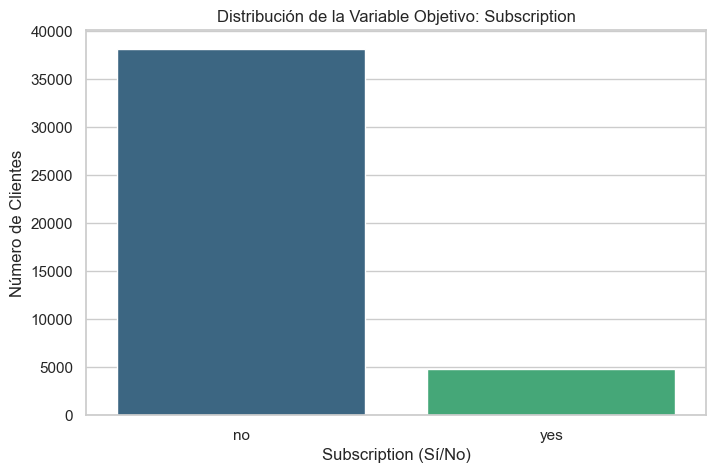

In [8]:
"""Se procede a realizar un análisis exploratorio de datos (EDA) para entender mejor las características del dataset y preparar el terreno para el modelado predictivo.
Para ello, se explorarán las variables más relevantes, se identificarán patrones y tendencias, y se visualizarán los datos de manera efectiva.
Inicialmente, empezaremos por estadísticas descriptivas y visualizaciones básicas para cada variable, seguidas de análisis más profundos según sea necesario.
"""

# --- ANÁLISIS EXPLORATORIO DE DATOS (EDA) ---
# Estadísticas descriptivas del DataFrame (numéricas)
print("\n--- Estadísticas descriptivas del DataFrame ---")
print(df_reordenado.describe(include=np.number).round(2))

# Estadísticas descriptivas del DataFrame (categóricas)
print("\n--- Estadísticas descriptivas del DataFrame (categóricas) ---")
print(df_reordenado.describe(include=['object', 'category']))

# Visualización de la distribución de la variable objetivo 'Subscription'
plt.figure(figsize=(8, 5))
sns.countplot(data=df_reordenado, x='Subscription', palette='viridis')
plt.title('Distribución de la Variable Objetivo: Subscription')
plt.xlabel('Subscription (Sí/No)')
plt.ylabel('Número de Clientes')

import pandas as pd

# Cargar el conjunto de datos
df_reordenado = pd.read_csv('bank_data_EDA_ready.csv')

# Filtrar solo los clientes que se suscribieron
df_exito = df_reordenado[df_reordenado['Subscription'] == 'yes']

print("--- Perfil del Cliente que ACEPTA la Oferta ---")
# Usamos .describe() con include='all' para ver tanto variables numéricas como categóricas
print(df_exito.describe(include='all').round(2))


Gráfico de análisis categórico guardado como 'analisis_categorico_vs_suscripcion.png'


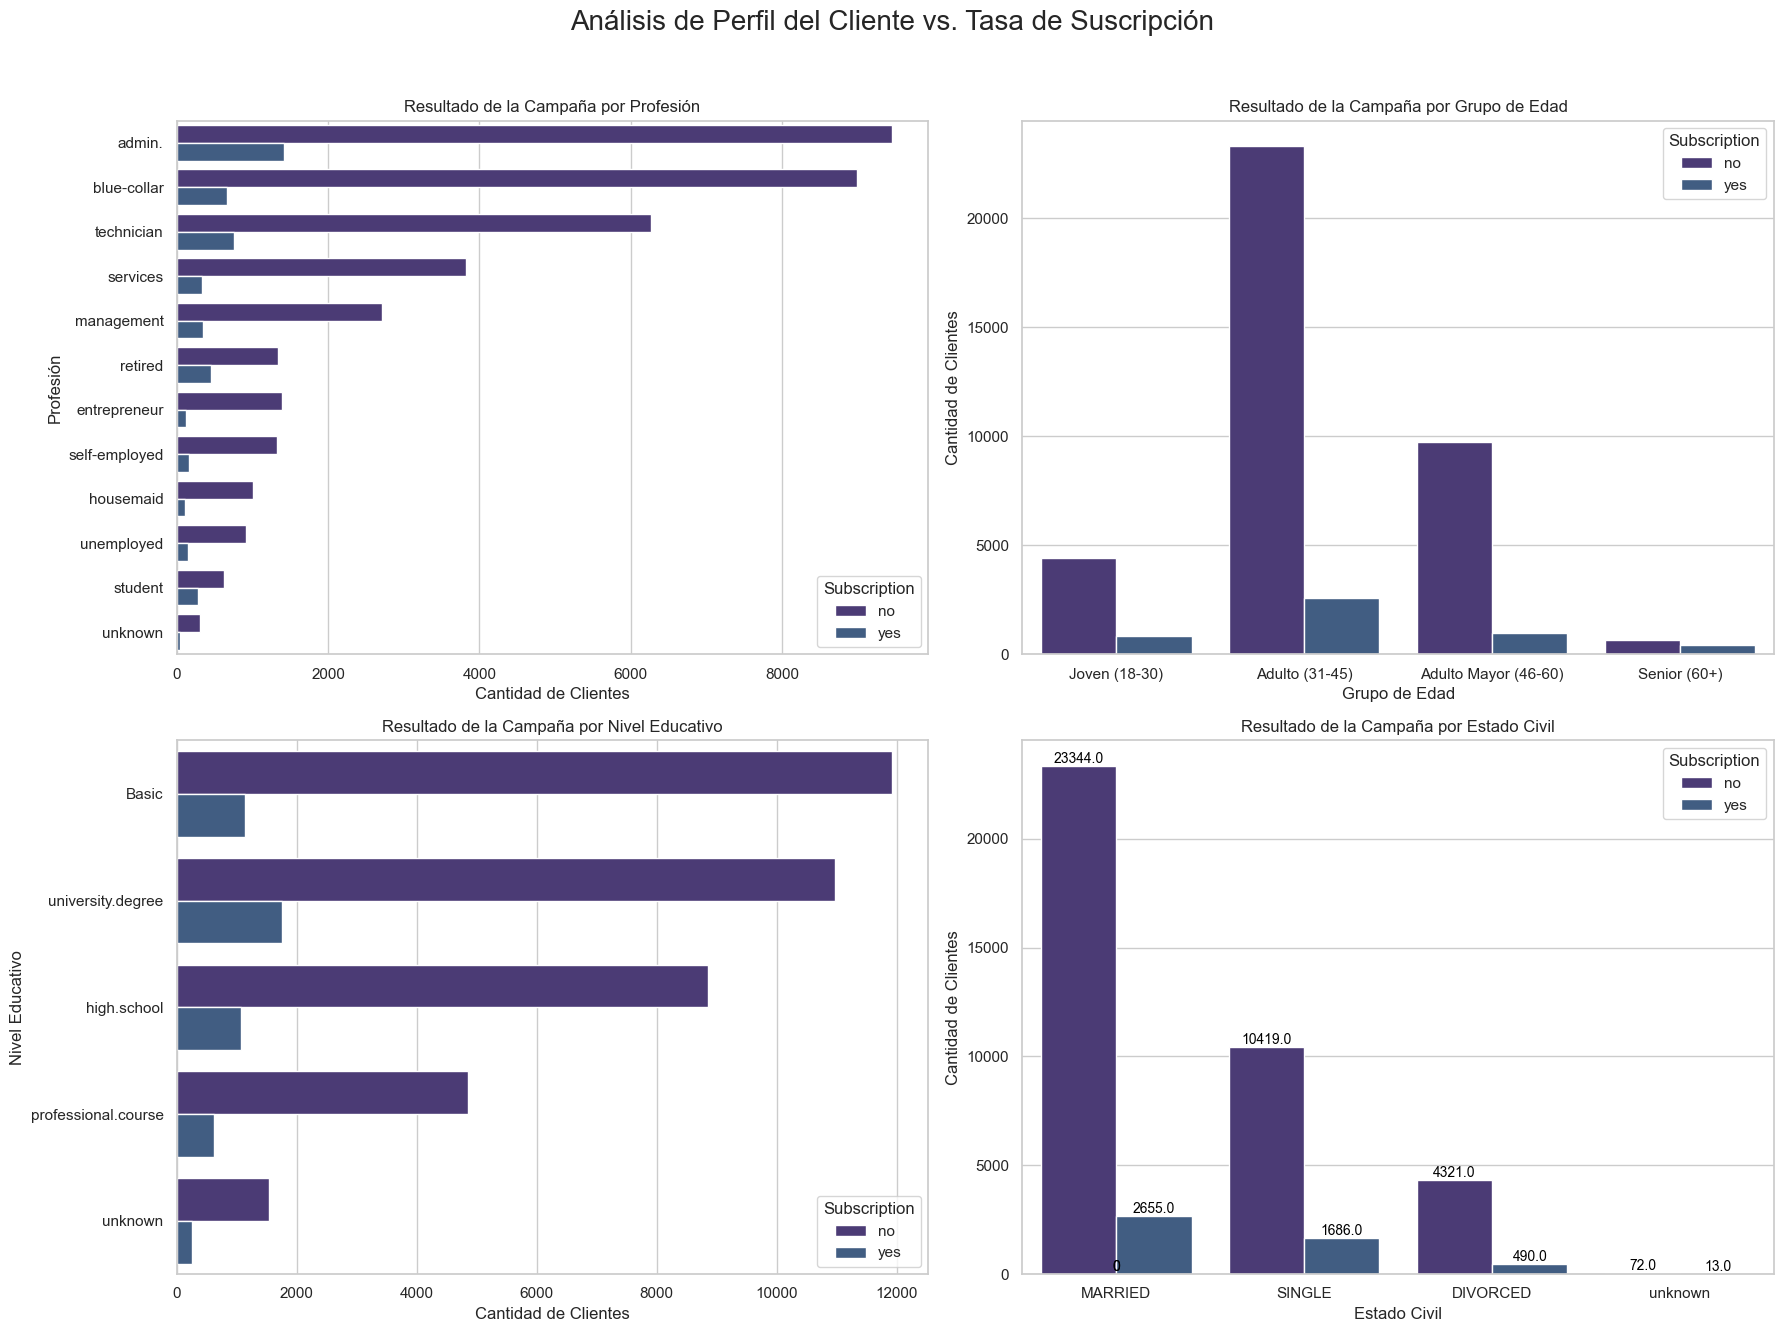

Gráfico de comportamiento guardado como 'grafico_comportamiento_vs_suscripcion.png'


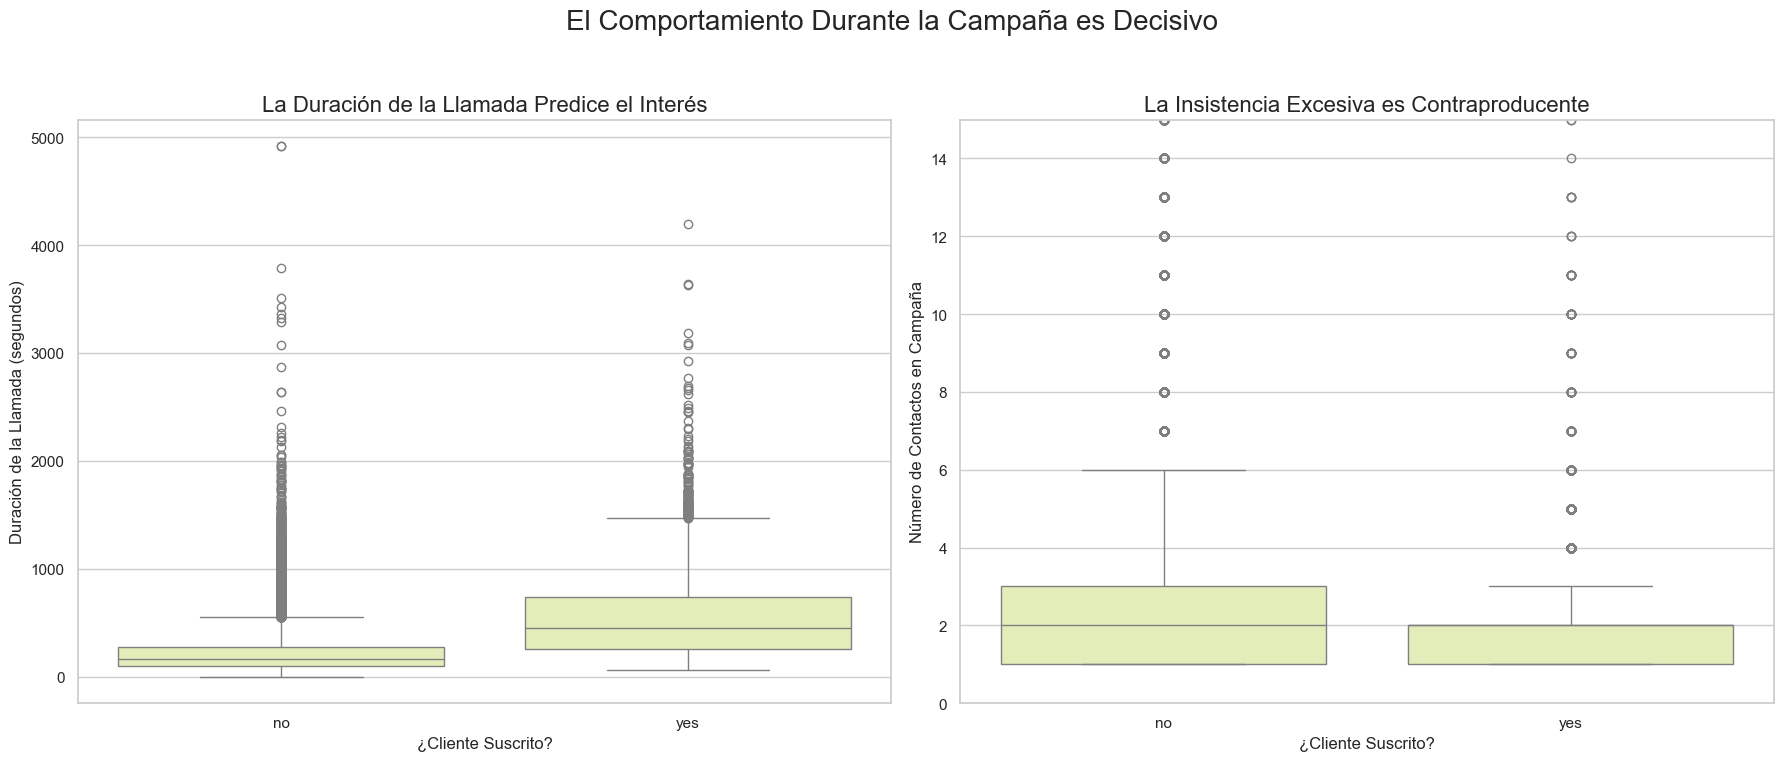

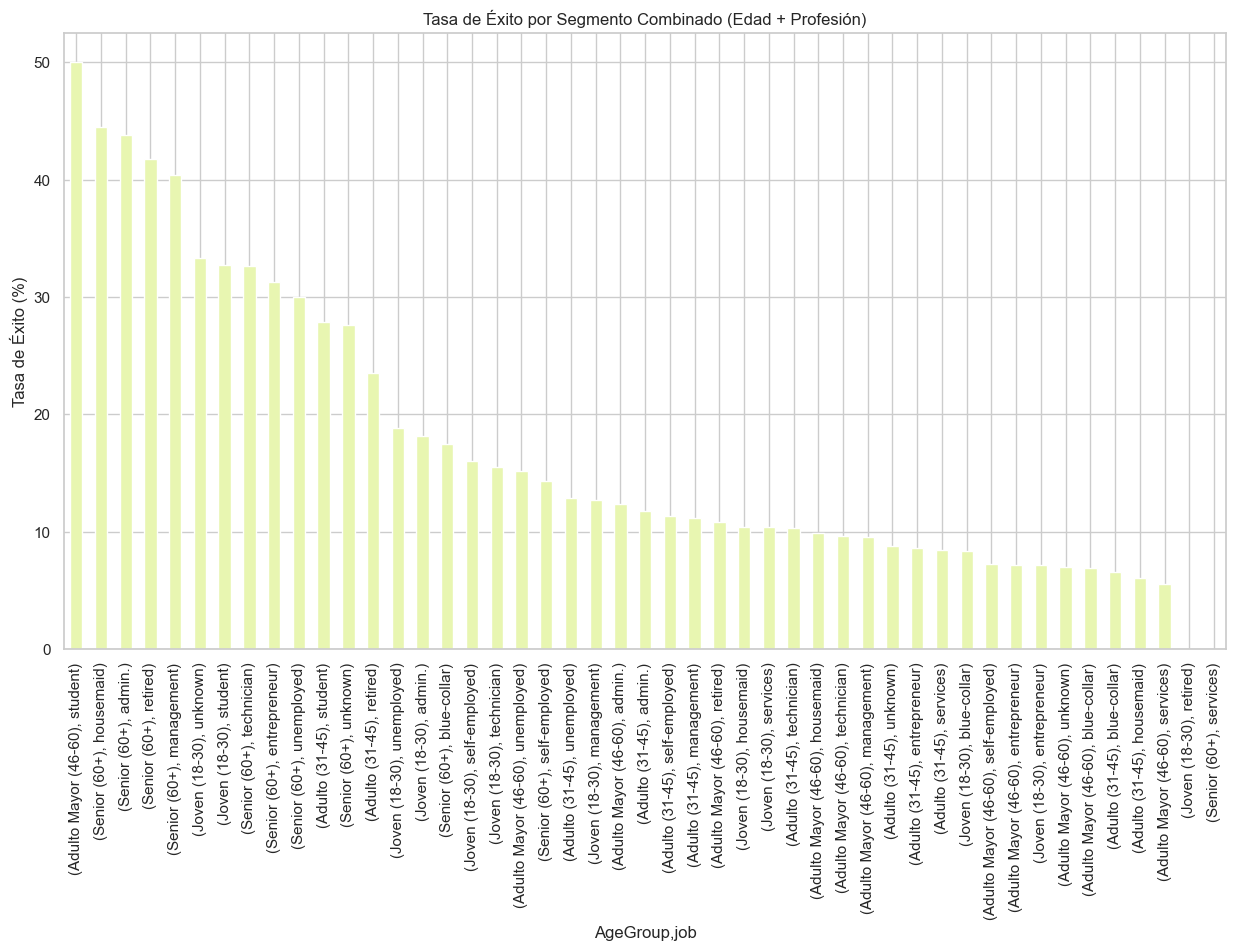

Subscription     no    yes
poutcome                  
FAILURE       85.77  14.23
NONEXISTENT   91.18   8.82
SUCCESS       34.68  65.32
Gráfico de análisis de poutcome guardado como 'analisis_poutcome.png'


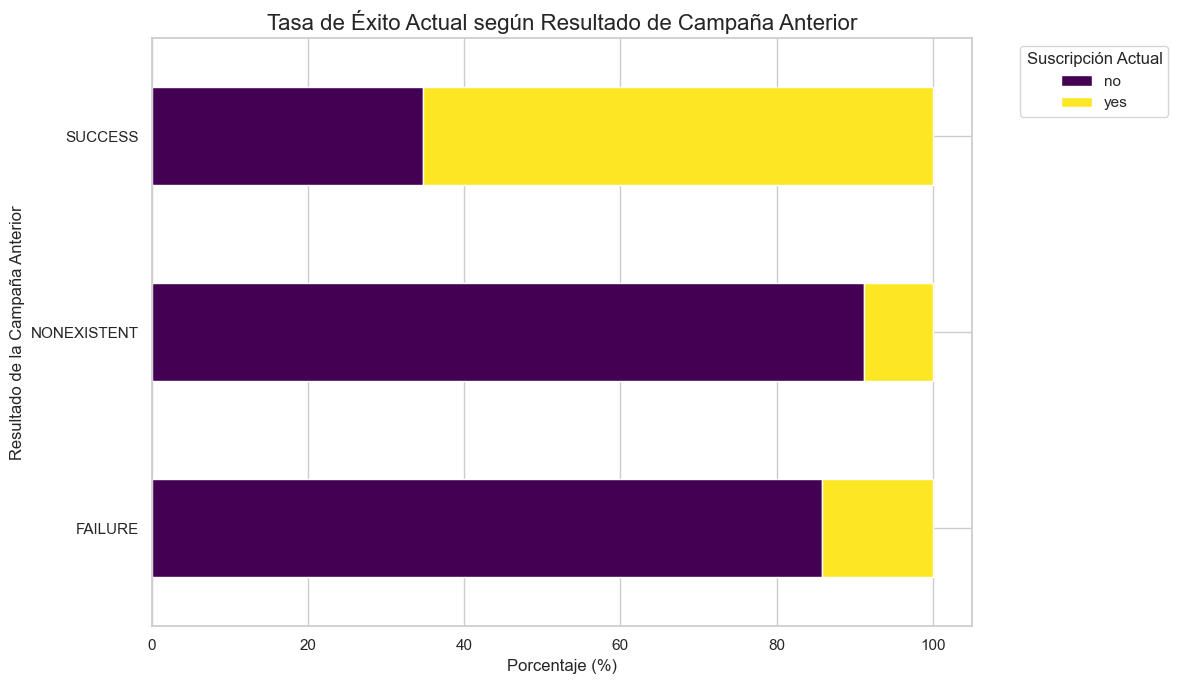

Gráfico de análisis de antigüedad guardado como 'analisis_antiguedad.png'


C:\Users\oargo\AppData\Local\Temp\ipykernel_3408\3853856765.py:151: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_reordenado, x='Subscription', y='Antiguedad_Anios', palette='coolwarm', order=['no', 'yes'])


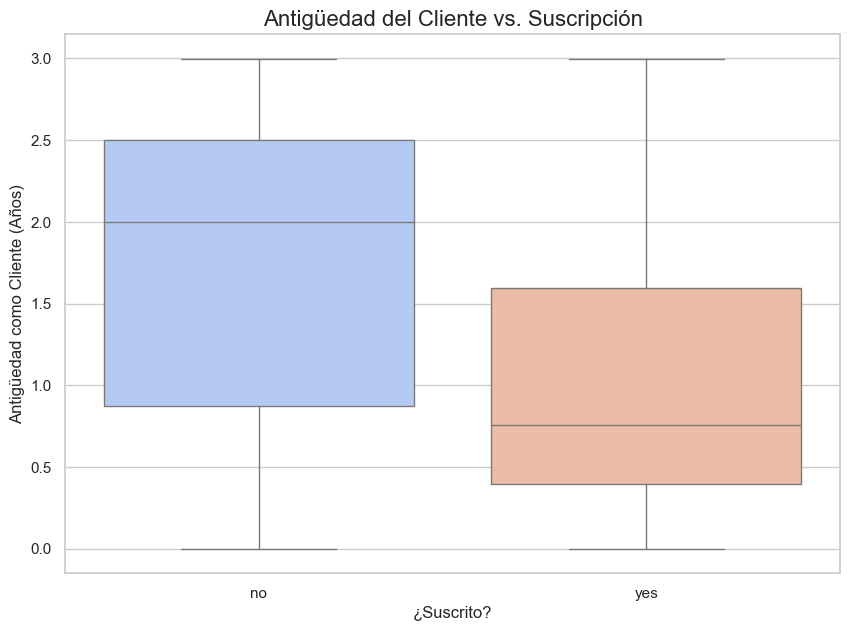

In [9]:
#OBSERVAMOS EL PERFIL DEMOGRÁFICO DE LOS CLIENTES

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el conjunto de datos final y limpio
try:
    df_reordenado = pd.read_csv('bank_data_EDA_ready.csv')
except FileNotFoundError:
    print("No se encontró el archivo 'bank_data_EDA_ready.csv'.")
    exit()

# Configurar el estilo de la visualización
sns.set(style="whitegrid", palette="viridis")
fig, axes = plt.subplots(2, 2, figsize=(18, 14))
fig.suptitle('Análisis de Perfil del Cliente vs. Tasa de Suscripción', fontsize=20)

# --- Gráfico 1: Profesión vs. Suscripción ---
sns.countplot(ax=axes[0, 0], data=df_reordenado, y='job', hue='Subscription', order=df_reordenado['job'].value_counts().index)
axes[0, 0].set_title('Resultado de la Campaña por Profesión')
axes[0, 0].set_xlabel('Cantidad de Clientes')
axes[0, 0].set_ylabel('Profesión')

# --- Gráfico 2: Grupo de Edad vs. Suscripción ---
sns.countplot(ax=axes[0, 1], data=df_reordenado, x='AgeGroup', hue='Subscription', order=['Joven (18-30)', 'Adulto (31-45)', 'Adulto Mayor (46-60)', 'Senior (60+)'])
axes[0, 1].set_title('Resultado de la Campaña por Grupo de Edad')
axes[0, 1].set_xlabel('Grupo de Edad')
axes[0, 1].set_ylabel('Cantidad de Clientes')

# --- Gráfico 3: Nivel Educativo vs. Suscripción ---
sns.countplot(ax=axes[1, 0], data=df_reordenado, y='Education', hue='Subscription', order=df_reordenado['Education'].value_counts().index)
axes[1, 0].set_title('Resultado de la Campaña por Nivel Educativo')
axes[1, 0].set_xlabel('Cantidad de Clientes')
axes[1, 0].set_ylabel('Nivel Educativo')

# --- Gráfico 4: Estado Civil vs. Suscripción ---
sns.countplot(ax=axes[1, 1], data=df_reordenado,x='marital', hue='Subscription')
axes[1, 1].set_title('Resultado de la Campaña por Estado Civil')
axes[1, 1].set_xlabel('Estado Civil')
axes[1, 1].set_ylabel('Cantidad de Clientes')
# mostrar los datos dentro del gráfico
for p in axes[1, 1].patches:
    axes[1, 1].annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                        ha='center', va='bottom', fontsize=10, color='black', rotation=0)
    



plt.tight_layout(rect=[0, 0.03, 1, 0.96])
plt.savefig("analisis_categorico_vs_suscripcion.png")
print("Gráfico de análisis categórico guardado como 'analisis_categorico_vs_suscripcion.png'")
plt.show()

# Gráfico 2: OBSERVACIÓN DEL COMPORTAMIENTO VS DEMOGRAFÍA

# Cargar el conjunto de datos final y limpio
try:
    df = pd.read_csv('bank_data_EDA_ready.csv')
except FileNotFoundError:
    print("No se encontró el archivo 'bank_data_EDA_ready.csv'. Asegúrate de que se haya ejecutado el paso anterior.")
    exit()

# Configurar el estilo de la visualización
sns.set(style="whitegrid", palette="YlGnBu")
fig, axes = plt.subplots(1, 2, figsize=(18, 8)) # 1 fila, 2 columnas
fig.suptitle('El Comportamiento Durante la Campaña es Decisivo', fontsize=20)

# --- Gráfico 1: Duración de la llamada vs. Suscripción ---
sns.boxplot(ax=axes[0], data=df, x='Subscription', y='duration', order=['no', 'yes'])
axes[0].set_title('La Duración de la Llamada Predice el Interés', fontsize=16)
axes[0].set_xlabel('¿Cliente Suscrito?', fontsize=12)
axes[0].set_ylabel('Duración de la Llamada (segundos)', fontsize=12)

# --- Gráfico 2: Nº de Contactos vs. Suscripción ---
sns.boxplot(ax=axes[1], data=df, x='Subscription', y='campaign', order=['no', 'yes'])
axes[1].set_title('La Insistencia Excesiva es Contraproducente', fontsize=16)
axes[1].set_xlabel('¿Cliente Suscrito?', fontsize=12)
axes[1].set_ylabel('Número de Contactos en Campaña', fontsize=12)

# IMPORTANTE: Los outliers en 'campaign' son tan extremos que aplastan las cajas
# y no nos dejan ver la distribución. Limitamos el eje Y para hacer zoom
axes[1].set_ylim(0, 15)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig("grafico_comportamiento_vs_suscripcion.png")
print("Gráfico de comportamiento guardado como 'grafico_comportamiento_vs_suscripcion.png'")
plt.show()

 #GRÁFICO 3: ANÁLISIS COMBINADO DE PERFILES

import pandas as pd
# Cargar datos
df_reordenado = pd.read_csv('bank_data_EDA_ready.csv')
# Calcular la tasa de éxito por grupo
tasa_exito_combinada = df_reordenado.groupby(['AgeGroup', 'job'])['Subscription'].value_counts(normalize=True).unstack()
tasa_exito_combinada['yes_rate'] = tasa_exito_combinada.get('yes', 0) * 100
# Visualizar 'yes_rate'
tasa_exito_combinada['yes_rate'].sort_values(ascending=False).plot(kind='bar', figsize=(15,8))
plt.ylabel('Tasa de Éxito (%)')
plt.title('Tasa de Éxito por Segmento Combinado (Edad + Profesión)')
plt.show()

#FRÁFICO 4: ANÁLISIS DE LA CAMPAÑA ANTERIOR
import pandas as pd
import matplotlib.pyplot as plt

# Cargar tu conjunto de datos
df_reordenado = pd.read_csv('bank_data_EDA_ready.csv')

# Calcular la tasa de éxito con crosstab
tasa_exito_poutcome = pd.crosstab(df['poutcome'], df_reordenado['Subscription'], normalize='index') * 100

print(tasa_exito_poutcome.round(2))

# Visualizarlo con un gráfico de barras apilado 100%
tasa_exito_poutcome.plot(
    kind='barh',
    stacked=True,
    figsize=(12, 7),
    colormap='viridis'
)

plt.title('Tasa de Éxito Actual según Resultado de Campaña Anterior', fontsize=16)
plt.xlabel('Porcentaje (%)')
plt.ylabel('Resultado de la Campaña Anterior')
plt.legend(title='Suscripción Actual', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.savefig("analisis_poutcome.png")
print("Gráfico de análisis de poutcome guardado como 'analisis_poutcome.png'")
plt.show()

#GRÁFICO 5 ANAÁLISIS DE LA ANTIGÚEDAD DEL CLIENTE
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar tu conjunto de datos
df_reordenado = pd.read_csv('bank_data_EDA_ready.csv')

# Convertir 'Dt_Customer' a formato de fecha
df_reordenado['Dt_Customer'] = pd.to_datetime(df_reordenado['Dt_Customer'])

# Calculamos la antigüedad en años hasta la fecha más reciente del dataset para consistencia
fecha_referencia = df_reordenado['Dt_Customer'].max()
df_reordenado['Antiguedad_Anios'] = (fecha_referencia - df_reordenado['Dt_Customer']).dt.days / 365.25

# Crear el gráfico para comparar la antigüedad
plt.figure(figsize=(10, 7))
sns.boxplot(data=df_reordenado, x='Subscription', y='Antiguedad_Anios', palette='coolwarm', order=['no', 'yes'])
plt.title('Antigüedad del Cliente vs. Suscripción', fontsize=16)
plt.xlabel('¿Suscrito?')
plt.ylabel('Antigüedad como Cliente (Años)')

plt.savefig("analisis_antiguedad.png")
print("Gráfico de análisis de antigüedad guardado como 'analisis_antiguedad.png'")
plt.show()

Mapa de calor de correlaciones guardado como 'mapa_correlacion.png'


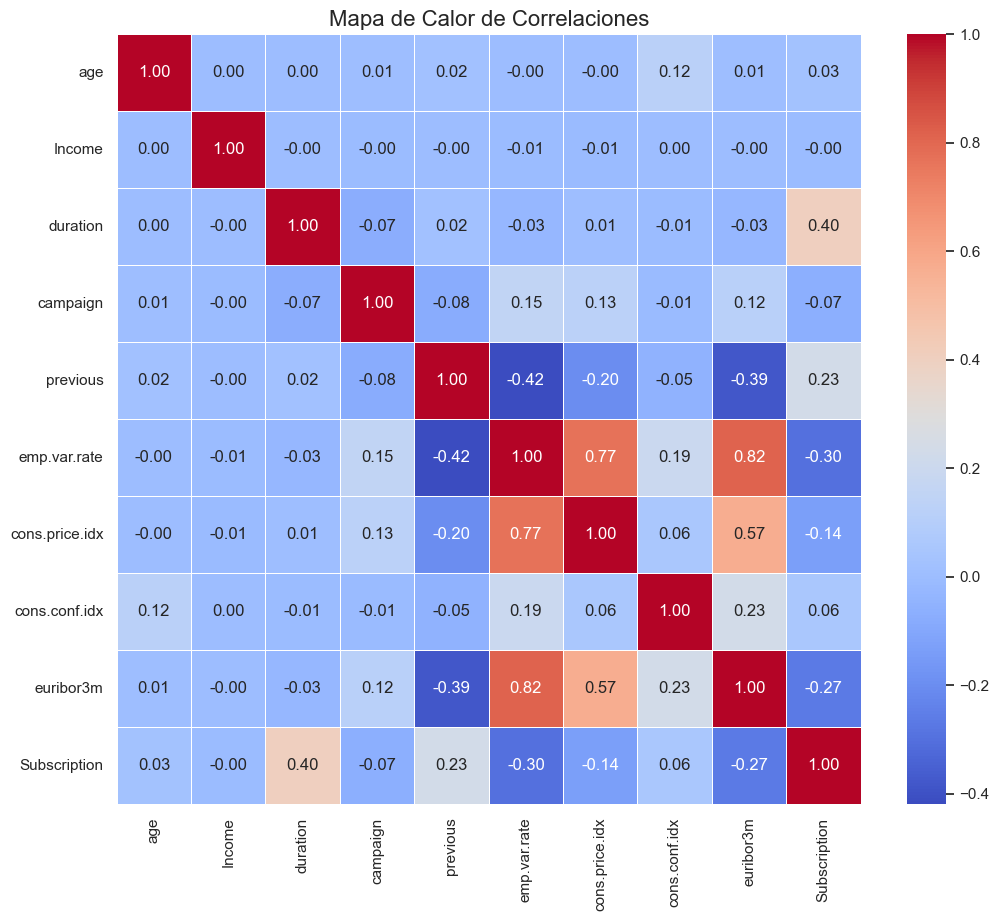

In [10]:
#Gráfico 6: análisis de correlacion entre variables

# Cargar el conjunto de datos final y limpio
try:
    df_reordenado = pd.read_csv('bank_data_EDA_ready.csv')
except FileNotFoundError:
    print("No se encontró el archivo 'bank_data_EDA_ready.csv'.")
    exit()

# Para el mapa de correlación, necesitamos convertir 'suscrito' a número (0 y 1)
df_reordenado['Subscription'] = df_reordenado['Subscription'].apply(lambda x: 1 if x == 'yes' else 0)

# Seleccionar solo las columnas numéricas relevantes para la correlación
numeric_cols = [
    'age', 'Income', 'duration', 'campaign', 'previous',
    'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'Subscription',
]

# Calcular la matriz de correlación
correlation_matrix = df_reordenado[numeric_cols].corr()

# Crear el mapa de calor
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Mapa de Calor de Correlaciones', fontsize=16)
plt.savefig("mapa_correlacion.png")
print("Mapa de calor de correlaciones guardado como 'mapa_correlacion.png'")
plt.show()

5.1. Estadísitica inferencial ( prueba de T y chi-cuadrado)

In [20]:
pip install scipy


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [21]:
import pandas as pd
from scipy import stats

# Cargar tu conjunto de datos
try:
    df = pd.read_csv('bank_data_EDA_ready.csv')
except FileNotFoundError:
    print("Asegúrate de que el archivo 'bank_data_EDA_ready.csv' exista en el directorio.")
    exit()

# Separar los dos grupos basados en la columna 'Subscription'
ingresos_si = df[df['Subscription'] == 'yes']['Income']
ingresos_no = df[df['Subscription'] == 'no']['Income']

# Realizar la prueba T
t_stat, p_value = stats.ttest_ind(ingresos_si, ingresos_no, equal_var=False)

print("--- 1. Resultados de la Prueba T para Ingresos vs. Subscription ---")
print(f"P-valor: {p_value:.4f}")

# Conclusión basada en el p-valor
if p_value < 0.05:
    print("Conclusión: La diferencia en los ingresos medios ES estadísticamente significativa.")
else:
    print("Conclusión: No hay evidencia estadística de una diferencia en los ingresos medios.")



import pandas as pd
from scipy.stats import chi2_contingency

# Cargar tu conjunto de datos
df = pd.read_csv('bank_data_EDA_ready.csv')

# Crear la tabla de contingencia
contingency_table = pd.crosstab(df['job'], df['Subscription'])

# Realizar la prueba Chi-Cuadrado
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

print("\n--- 2. Resultados de la Prueba Chi-Cuadrado para Profesión vs. Subscription ---")
print(f"P-valor: {p_value:.4f}")

# Conclusión basada en el p-valor
if p_value < 0.05:
    print("Conclusión: La asociación entre la profesión y la suscripción ES estadísticamente significativa.")
else:
    print("Conclusión: No hay evidencia de una asociación entre la profesión y la suscripción.")

--- 1. Resultados de la Prueba T para Ingresos vs. Subscription ---
P-valor: 0.3344
Conclusión: No hay evidencia estadística de una diferencia en los ingresos medios.

--- 2. Resultados de la Prueba Chi-Cuadrado para Profesión vs. Subscription ---
P-valor: 0.0000
Conclusión: La asociación entre la profesión y la suscripción ES estadísticamente significativa.


OPCIONAL: creación de un score para agrupar toda la información analizada y nos permita puntuar a los clientes para campañas futuras

Se ha creado la columna 'Interest_Score'.
Ejemplo de los scores calculados:
         job              AgeGroup     poutcome  campaign  Interest_Score  \
0  housemaid        Adulto (31-45)  NONEXISTENT         1               1   
1   services  Adulto Mayor (46-60)  NONEXISTENT         1               1   
2   services        Adulto (31-45)  NONEXISTENT         1               1   
3     admin.        Adulto (31-45)  NONEXISTENT         1               1   
4   services  Adulto Mayor (46-60)  NONEXISTENT         1               1   

  Subscription  
0           no  
1           no  
2           no  
3           no  
4           no  

Gráfico de análisis de score guardado como 'analisis_final_score.png'


C:\Users\oargo\AppData\Local\Temp\ipykernel_3408\3169892379.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Subscription', y='Interest_Score', data=df, palette='plasma')


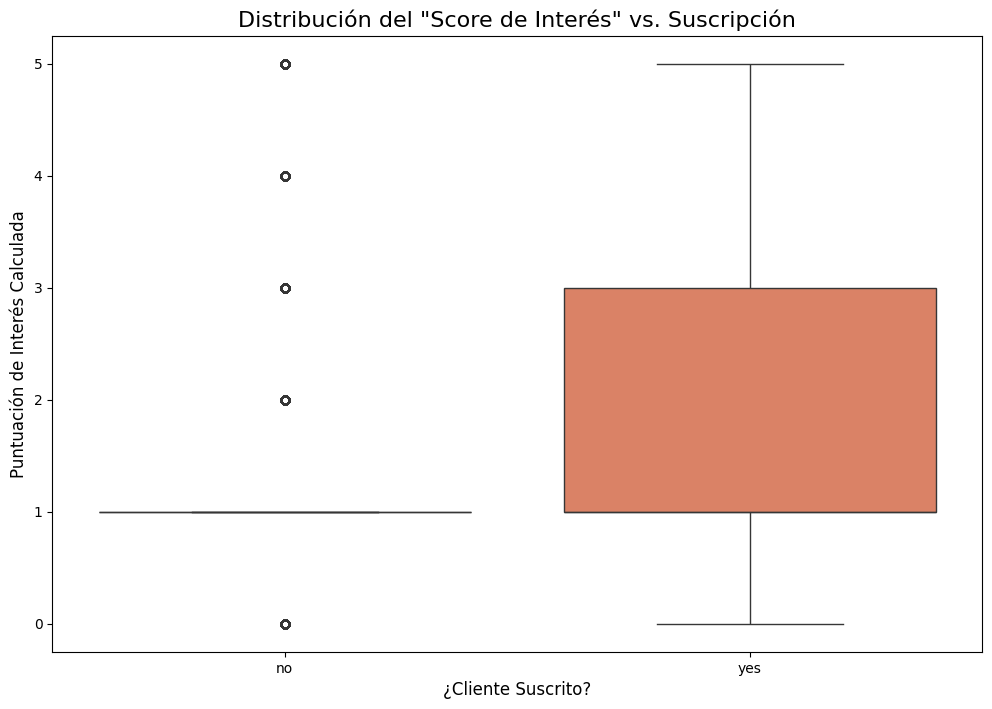


--- Score de Interés Medio por Grupo ---
AgeGroup
Adulto (31-45)          0.85
Adulto Mayor (46-60)    0.95
Joven (18-30)           3.07
Senior (60+)            4.19
Name: Interest_Score, dtype: float64
Subscription
no     1.18
yes    1.71
Name: Interest_Score, dtype: float64


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el conjunto de datos final y limpio
try:
    df = pd.read_csv('bank_data_EDA_ready.csv')
except FileNotFoundError:
    print("No se encontró el archivo 'bank_data_EDA_ready.csv'.")
    exit()

# --- 1. Definir la función para calcular el score ---
def calcular_score_interes(row):
    score = 0
    # Regla 1: Resultado de la campaña anterior (la más potente)
    if row['poutcome'] == 'success':
        score += 3
    
    # Regla 2: Grupo de Edad de alta conversión
    if row['AgeGroup'] in ['Joven (18-30)', 'Senior (60+)']:
        score += 2
        
    # Regla 3: Profesión de alta conversión
    if row['job'] in ['student', 'retired']:
        score += 2
        
    # Regla 4: Número de contactos bajo
    if row['campaign'] <= 3:
        score += 1
        
    return score

# --- 2. Aplicar la función para crear la nueva columna 'Interest_Score' ---
# Usamos .apply() en el DataFrame, un método muy potente de pandas
df['Interest_Score'] = df.apply(calcular_score_interes, axis=1)

print("Se ha creado la columna 'Interest_Score'.")
print("Ejemplo de los scores calculados:")
print(df[['job', 'AgeGroup', 'poutcome', 'campaign', 'Interest_Score', 'Subscription']].head())


# --- 3. Visualizar el resultado ---
# Comparamos la distribución del score entre los que se suscribieron y los que no.
plt.figure(figsize=(12, 8))
sns.boxplot(x='Subscription', y='Interest_Score', data=df, palette='plasma')
plt.title('Distribución del "Score de Interés" vs. Suscripción', fontsize=16)
plt.xlabel('¿Cliente Suscrito?', fontsize=12)
plt.ylabel('Puntuación de Interés Calculada', fontsize=12)
plt.savefig("analisis_final_score.png")
print("\nGráfico de análisis de score guardado como 'analisis_final_score.png'")
plt.show()


# --- 4. Verificación Numérica ---
print("\n--- Score de Interés Medio por Grupo ---")
print(df.groupby('AgeGroup')['Interest_Score'].mean().round(2))
print(df.groupby('Subscription')['Interest_Score'].mean().round(2))